## Simulating the Ising Model - CompPhys Homework 1
-Aleena Sibi(s6alsibi) and Kriti Baweja(s6krbawe)

### Questions
<b>Que-1)</b> Discuss the Physical meaning of J, in particular the sign of J and the role it plays in magnets? <br>
<b>Ans-1)</b> J in the expression represents the interaction strength(coupling) between two spins. The sign of J will determine the kind of interaction between the spins i.e. if its is attractive or repulsive, if J is positive the spins will tend to align with each other and if J is negative the spins tend align antiparallel to each other because it is energetically favourable. <br>
This is also seen in the case of magnets where the potential energy of the (classical) magnetic dipoles is given by -<b>m.B</b> where <b>m</b> is the magnetic dipole moment and <b>B</b> is the external magnetic field. The (classical) dipole magnets have the lowest energy when they are parallel to<b> B</b> and that is when its potential energy is the minimum and vice versa. <br> J>0 is analogus to classical magnets as the spins tend to align with each other.

<b>Que-2)</b> Clarify what it means to have periodic boundary conditions?<br>
<b>Ans-2)</b> Periodic boundary conditions in one dimension essentially means that the first spin is interacting with the last spin i.e. our lattice is circular or a ring. There are no end points.

<b> Que-3) </b> what are the relevant dimensionless ratio in the problem?<br>
<b> Ans-3) </b> The Relevant dimensionless ratios are: <br>
i) J/T <br>
ii)  h/T <br>


In [47]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
from tqdm import tqdm

$$ H(s) = −J\sum_{\langle x,y \rangle} s_xs_y - h\sum_x s_x$$

### Role of J
<list>
    <li> Strength of coupling between the spins </li>
    <li> The sign of J decides the kind of interaction between the spins </li>
        <li> There are also systems where J depends on the spin pair we select??? </li>
    <li> Choosing J = 1 implies what? => When spins are aligned, the energy is negative (attractive??) and when not aligned, it's positive (repulsive???). </li>
</list>

### Role of h
<list>
    <li> Measure of the external magnetic(?) field applied </li>
   <li> Trying to see with differetn values of h. <\li>
       <li> h ∈ [−1, 1] </li>

In [86]:
N = 10
J = 1.
spins = [np.random.choice([-1,1]) for i in range(N)]
spin1 = np.copy(spins)

In [87]:
J = 1.
T = 1.
def hastings(h,k,spins):
    dM = 0
    N = np.shape(spins)[0]
    dE = 2*J*spins[k]*spins[k-1] + 2*J*spins[k]*spins[(k+1)%N] + 2*h*spins[k]
    if (dE < 0 or np.random.uniform(0,1) < np.exp(-dE/T)):
        
        dM = -2*spins[k]
        spins[k] *= -1
        
        #print(dM)
    return dM

def mExactN(h,N,J=1):
    s = np.sinh(h)
    c = np.cosh(h)
    expm4J = np.exp(-4*J)
    ratio = (c-np.sqrt(s**2+expm4J))/(c+np.sqrt(s**2+expm4J))
    answer = (1-ratio**N)/(1+ratio**N)
    answer *= s/np.sqrt(s**2+expm4J)
    return answer

# exact answer in thermodynamic limit
def mExact(h,J=1):
    s = np.sinh(h)
    c = np.cosh(h)
    expm4J = np.exp(-4*J)
    answer = s/np.sqrt(s**2+expm4J)
    return answer

### $\langle m \rangle$ vs h

In [88]:
Nsim = 10000 #Number of simulations that we have to run
harr = np.linspace(-1,1,101)

Marr = []

for i in tqdm(range(len(harr))):
    spins = spin1
    M = np.sum(spins)
    Mp = 0
    
    for k in range(Nsim):
        p = r.randint(0,N-1)
        #print(k)
        dm = hastings(harr[i],p,spins)
        M = M + dm
        
        if( k>3000):
            Mp += M/N
            
    Marr.append(Mp/7000)

    


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:20<00:00,  4.98it/s]


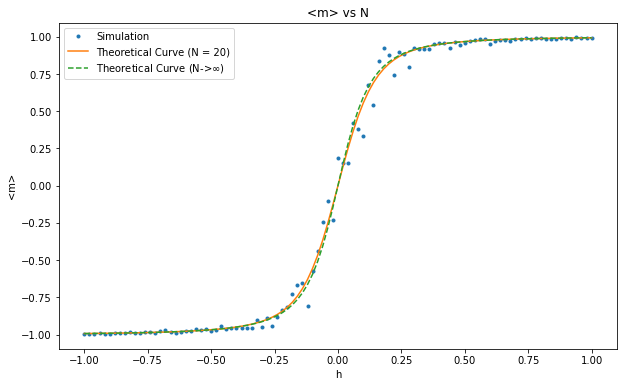

In [109]:
plt.figure(figsize=(10,6))
plt.title("<m> vs N")
plt.xlabel("h")
plt.ylabel("<m>")
plt.plot(harr,Marr,'.',label = 'Simulation')
plt.plot(harr,mExactN(harr,N),label = 'Theoretical Curve (N = 20)')
plt.plot(harr,mExact(harr),'--',label = 'Theoretical Curve (N->$\infty$)')
plt.legend()

The data points obtained via sampling agree very well with both the analytical curve, despite having such a small lattice size. As expected, for lower values of h (h ~ [-0.25,0.25]), the magnetization tends to 1, i.e. higher the field strength, the more likely it is for the spins to align themselves with the field.

### $\langle m\rangle$ vs N

In [121]:
Nsim = 10000 #Number of simulations that we have to run
Narr = np.arange(1,20,1)

Marr1 = []

for i in tqdm(range(len(Narr))):
    spin = [np.random.choice([-1,1]) for i in range(Narr[i])]    
    M = np.sum(spin)
    Mp = 0
    
    for k in range(Nsim):
        p = r.randint(0,Narr[i]-1)
        dm = hastings(1.,p,spin)
        M = M + dm
        
        if( k>3000):
            Mp += M/Narr[i]
            
    Marr1.append(Mp/6999)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:06<00:00,  3.00it/s]


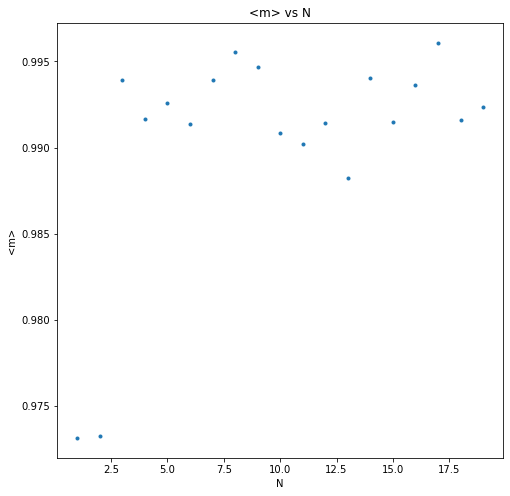

In [122]:
plt.figure(figsize=(8,8))
plt.title("<m> vs N")
plt.xlabel("N")
plt.ylabel("<m>")
plt.plot(Narr,Marr1,'.')

Here, we have chosen h = 1. (We did try to plot for other values of h, but haven't shown any of it here), As expected, since the field is very high, the spins are aligned with the field (and hence have magnetization ~ 1), As N increases, we can see the magnetization slowly decreasing.  